# Problem Statement 

We have a Mushroom Data which classified if mushroom are Editable or Poisonous ,
According to features in it.   We will try to use this data to create a model,
Which tried to predict if a mushroom is edible or poisonous.


# Importing Relevent Libraries

In [84]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading and Understanding the Data 

In [12]:
ms = pd.read_csv("G:\python\mushroomsDT.csv")

In [13]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
# lets see the no of rows and columns we have 
ms.shape

(8124, 23)

In [15]:
# lets see the information of the dataset 
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [16]:
# describe function shows only numeric data 
ms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Lets fill the Nulls 

In [17]:
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
# there is no nulls present in the data 

# Data Exploration

In [20]:
ms['class'].value_counts()   
# e = editable 
# p = Poissonous

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

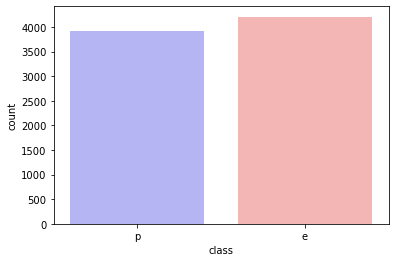

In [23]:
sns.countplot(x= "class" , data = ms , palette= "bwr")


# Lets fill the Categorical Values with the Numeric Values

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
ms["class"]=ms["class"].replace({'p':0, 'e':1})

In [27]:
ms[ms.select_dtypes(include='object').columns]=ms[ms.select_dtypes(include='object').columns].apply(le.fit_transform)

In [28]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Lets Split the Data into Train and Test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
ms_train, ms_test = train_test_split(ms, test_size= .2)

In [31]:
ms_train_x = ms_train.iloc[:,1::]
ms_train_y = ms_train.iloc[:, 0]

In [32]:
ms_test_x = ms_test.iloc[:,1::]
ms_test_y = ms_test.iloc[:, 0]

# Lets Create a Dicision tree model for Classification based on Gini and Entropy

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_ms.feature_importances_

array([0.        , 0.        , 0.00335368, 0.02672259, 0.03797506,
       0.        , 0.        , 0.1253284 , 0.34301216, 0.02668581,
       0.00909055, 0.        , 0.00654473, 0.        , 0.        ,
       0.        , 0.        , 0.01890353, 0.0091768 , 0.20665239,
       0.17397597, 0.01257833])

In [41]:
dt_ms.feature_importances_.sum()

0.9999999999999999

In [79]:
ms_train_x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [80]:
feature_imp = pd.DataFrame({'Features' : ms_train_x.columns , 'Importance':dt_ms.feature_importances_})

In [81]:
feature_imp.sort_values('Importance',ascending=False)

,Features,Importance
8,gill-color,0.347765
19,spore-print-color,0.198923
20,population,0.185939
7,gill-size,0.118393
4,odor,0.035387
3,bruises,0.027519
9,stalk-shape,0.025660
21,habitat,0.025498
13,stalk-color-above-ring,0.015403
10,stalk-root,0.013345


In [102]:
accuracies = {}

In [82]:
# the top features are most important features for the model to train the model.
# out of 23 only 13 features are important for creating a model 

# Build the Decision Tree Model with Entropy 

In [191]:
from sklearn.tree import DecisionTreeClassifier

dt_ms=DecisionTreeClassifier(criterion= "entropy",max_depth= 5)


In [192]:
dt_ms.fit(ms_train_x, ms_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [193]:
pred_ms= dt_ms.predict(ms_test_x)

In [194]:

from sklearn.metrics import confusion_matrix

In [195]:
tab_ms=confusion_matrix(ms_test_y,pred_ms)
tab_ms


array([[742,   0],
       [ 47, 836]], dtype=int64)

In [196]:
acc = accuracy_score(ms_test_y, pred_ms)

accuracies['Decision Tree with Entropy'] = acc
acc

0.9710769230769231

In [197]:
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [198]:
dot_data = StringIO()

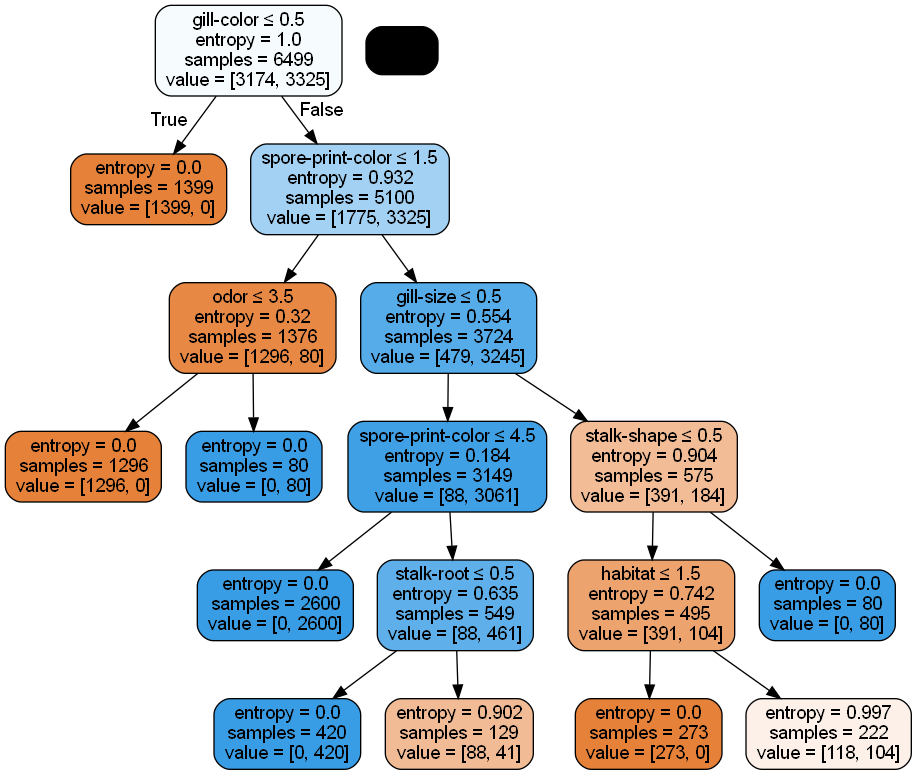

In [199]:
export_graphviz(dt_ms, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=ms_train_x.columns  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Build the Decision Tree Model with Gini

In [143]:
from sklearn.tree import DecisionTreeClassifier

dt_ms=DecisionTreeClassifier(max_depth=5)
    # give the tree details 
                                                # use entropy of gini 
                                                # use tab -shipt


In [144]:
dt_ms.fit(ms_train_x, ms_train_y)

DecisionTreeClassifier(max_depth=5)

In [145]:
pred_ms= dt_ms.predict(ms_test_x)

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:

tab_ms=confusion_matrix(ms_test_y,pred_ms)
tab_ms

array([[732,  10],
       [ 31, 852]], dtype=int64)

In [148]:
acc = accuracy_score(ms_test_y, pred_ms)
accuracies['Decision Tree with Gini'] = acc
acc

0.9747692307692307

In [165]:
dot_data = StringIO()

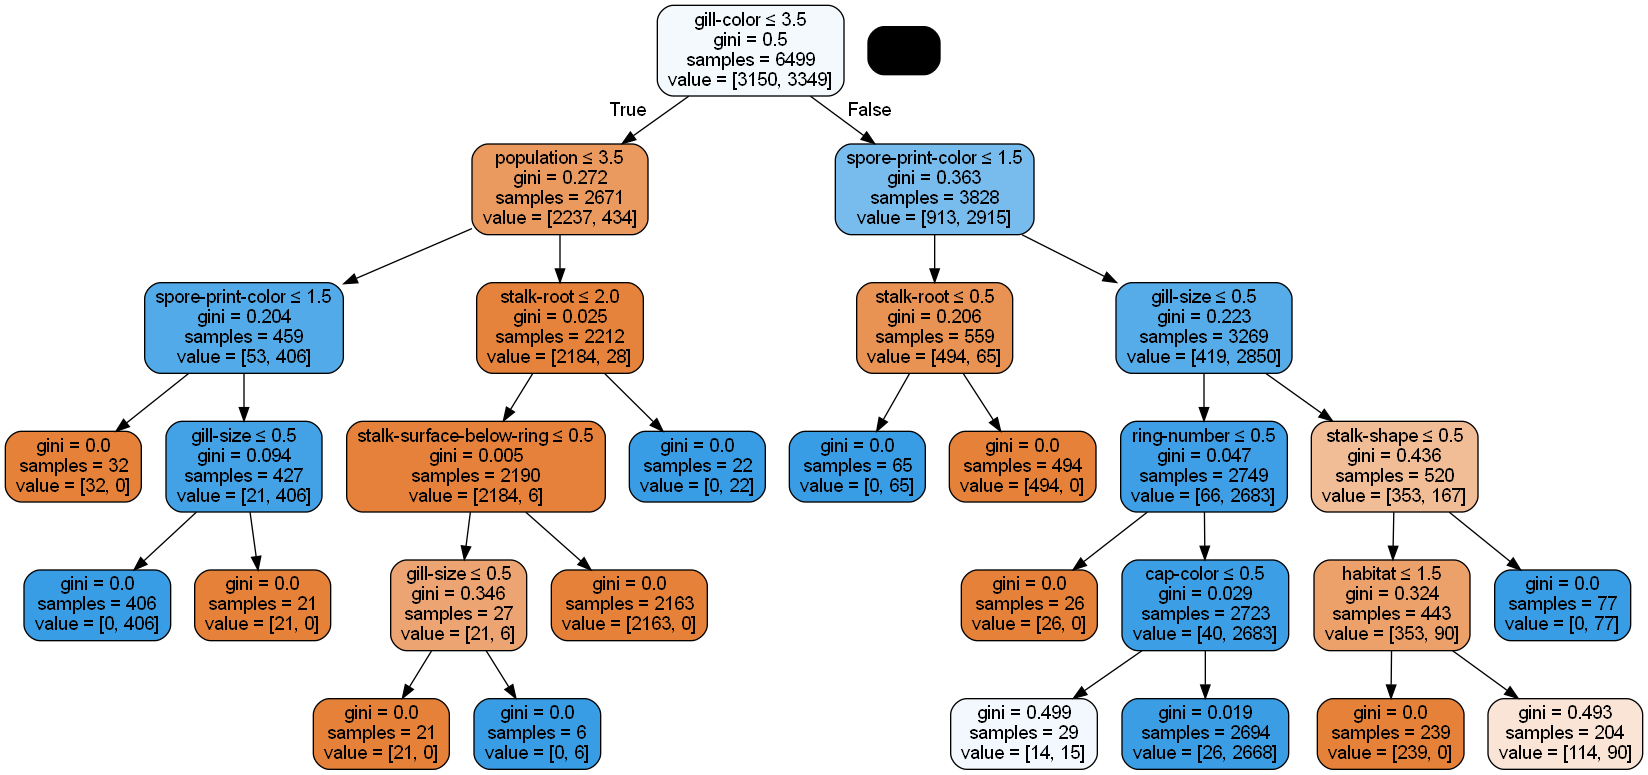

In [166]:
export_graphviz(dt_ms, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=ms_train_x.columns  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Observation :-
1. In Decision tree classifier with entropy tree structure the model accuracy
   is around 0.9733 means 97% .
   And 
2. In Decision tree classifier with Gini tree structure the model accuracy        is around 0.9766 means 97% . 
* Overall there is a minnor diffrence between these two model .
    


 #  Lets Build the Logistic Regression classifier Model 

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
log_ms=LogisticRegression()

In [151]:
log_ms.fit(ms_train_x,ms_train_y)

C:\Users\karti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [152]:
pred = log_ms.predict(ms_test_x)

In [153]:
pd.crosstab(ms_test_y,pred)

col_0,0,1
class,,
0,702,40
1,46,837


In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
tab_ms =confusion_matrix(ms_test_y,pred)
tab_ms

array([[702,  40],
       [ 46, 837]], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
acc= accuracy_score(ms_test_y,pred)
accuracies['Logistic Regression'] = acc
acc

0.947076923076923

In [54]:
from sklearn.metrics import precision_score

In [55]:
precision_score(ms_test_y,pred)

0.9543899657924744

In [56]:
from sklearn.metrics import recall_score

In [57]:
recall_score(ms_test_y,pred)

0.9479048697621744

In [58]:
from sklearn.metrics import f1_score

In [59]:
f1_score(ms_test_y,pred)

0.9511363636363637

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [61]:
roc_auc_score(ms_test_y,pred)

0.946998256983513

In [62]:
pred_prob = log_ms.predict_proba(ms_test_x)

In [63]:
pred_prob

array([[1.31776664e-02, 9.86822334e-01],
       [9.99941671e-01, 5.83291236e-05],
       [1.90880623e-02, 9.80911938e-01],
       ...,
       [3.54177004e-02, 9.64582300e-01],
       [4.65418954e-03, 9.95345810e-01],
       [5.05390385e-03, 9.94946096e-01]])

In [64]:
fpr,tpr,thres=roc_curve(ms_test_y,pred_prob[:,-1])

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'Auroc is 0.94777')

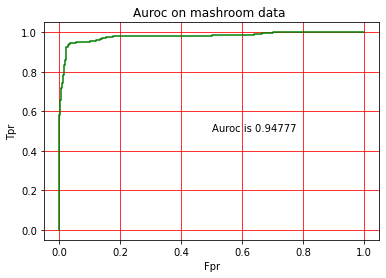

In [66]:
plt.plot(fpr,tpr,color ='g')
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("Auroc on mashroom data ")
plt.grid(color = 'r')
plt.text(x= .5 , y =.5 ,s= "Auroc is 0.94777")


# Observation :
 Test accuracy of Logistic regression is 94% .

# Lets build the Randam forest Classifer with Gini tree structure

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf_ms= RandomForestClassifier(n_estimators=100)

In [160]:
rf_ms.fit(ms_train_x, ms_train_y)

RandomForestClassifier()

In [161]:
pred_ms = rf_ms.predict(ms_test_x)

In [162]:
pred_ms

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [163]:
from sklearn.metrics import confusion_matrix

In [164]:
tab_ms = confusion_matrix(ms_test_y,pred_ms)
tab_ms

array([[742,   0],
       [  0, 883]], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [166]:
acc = accuracy_score(ms_test_y, pred_ms)
accuracies['Random Forest with Gini'] = acc
acc

1.0

In [ ]:
recall_score(ms_test_y,pred_ms)

In [ ]:
precision_score(ms_test_y, pred_ms)

In [ ]:
f1_score(ms_test_y, pred_ms)

In [106]:
rf_ms.feature_importances_

array([0.00568099, 0.00961683, 0.01070404, 0.04842969, 0.17007574,
       0.00271093, 0.04406602, 0.10300561, 0.13031242, 0.02215884,
       0.05647743, 0.05094156, 0.04192077, 0.01479812, 0.01483105,
       0.        , 0.00243922, 0.01223217, 0.05412503, 0.10455145,
       0.07103955, 0.02988253])

In [107]:
fi_db = pd.DataFrame({'feature':ms_train_x.columns,"importances": rf_ms.feature_importances_})

In [108]:
fi_db.sort_values("importances",ascending=False)

,feature,importances
4,odor,0.170076
8,gill-color,0.130312
19,spore-print-color,0.104551
7,gill-size,0.103006
20,population,0.071040
10,stalk-root,0.056477
18,ring-type,0.054125
11,stalk-surface-above-ring,0.050942
3,bruises,0.048430
6,gill-spacing,0.044066


# Random forest model with Entropy tree structure

In [167]:
rf_ms= RandomForestClassifier(n_estimators=120,criterion="entropy")

In [168]:
rf_ms.fit(ms_train_x, ms_train_y)

RandomForestClassifier(criterion='entropy', n_estimators=120)

In [169]:
rf_ms.fit(ms_train_x, ms_train_y)

RandomForestClassifier(criterion='entropy', n_estimators=120)

In [170]:
pred_ms= rf_ms.predict(ms_test_x)

In [171]:
pred_ms

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [174]:
acc =accuracy_score(ms_test_y, pred_ms)
accuracies['Decision Tree with Entropy'] = acc
acc

1.0

# Observation :-
1. In Random forest classifier with Gini tree structure the model accuracy
   is around 0.9753 means 97% .
   And 
2. In Decision tree classifier with Gini tree structure the model accuracy is 100%        is around 0.9766 means 97% . 
* Overall the Entropy  tree struture classification tree model is best .

# Lets build a  K Nearest Neighbor classifier model 


In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
knn_ms = KNeighborsClassifier(n_neighbors=100)   # its depend on neibours of the matrix is change on that 

In [177]:
knn_ms.fit(ms_train_x, ms_train_y)

KNeighborsClassifier(n_neighbors=100)

In [178]:
pred_ms = knn_ms.predict(ms_test_x)

In [179]:
pred_ms

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
tab= confusion_matrix(ms_test_y,pred_ms)

In [182]:
tab

array([[671,  71],
       [  9, 874]], dtype=int64)

In [183]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


In [184]:
acc =accuracy_score(ms_test_y,pred_ms)
accuracies['KNN model '] = acc
acc

0.9507692307692308

In [124]:
recall_score(ms_test_y,pred_ms)

0.9860302677532014

In [125]:
f1_score(ms_test_y,pred_ms)

0.9576031656302996

In [126]:
precision_score(ms_test_y,pred_ms)

0.9307692307692308

In [127]:
acc=[]
for i in range(1,200):
    knn_ms = KNeighborsClassifier (n_neighbors=i )
    knn_ms.fit(ms_train_x, ms_train_y)
    pred_ms = knn_ms.predict(ms_test_x)
    tab_ms=confusion_matrix(ms_test_y,pred_ms)
    acc.append(tab_ms.diagonal().sum()*100/tab_ms.sum())


In [128]:
acc

[99.93846153846154,
 99.87692307692308,
 99.93846153846154,
 99.87692307692308,
 99.87692307692308,
 99.87692307692308,
 99.93846153846154,
 99.87692307692308,
 99.87692307692308,
 99.87692307692308,
 99.6923076923077,
 99.75384615384615,
 99.56923076923077,
 99.56923076923077,
 99.56923076923077,
 99.63076923076923,
 99.63076923076923,
 99.56923076923077,
 99.56923076923077,
 99.63076923076923,
 99.56923076923077,
 99.56923076923077,
 99.38461538461539,
 99.38461538461539,
 99.32307692307693,
 99.32307692307693,
 99.26153846153846,
 99.26153846153846,
 99.01538461538462,
 99.07692307692308,
 99.01538461538462,
 99.13846153846154,
 99.01538461538462,
 98.95384615384616,
 98.8923076923077,
 98.64615384615385,
 98.64615384615385,
 98.64615384615385,
 98.58461538461539,
 98.58461538461539,
 98.52307692307693,
 98.58461538461539,
 98.4,
 98.46153846153847,
 98.4,
 98.4,
 98.27692307692308,
 98.33846153846154,
 98.27692307692308,
 98.27692307692308,
 98.27692307692308,
 98.27692307692308,
 

In [129]:
k_values =list(range(1,200))

In [130]:
import matplotlib.pyplot as plt


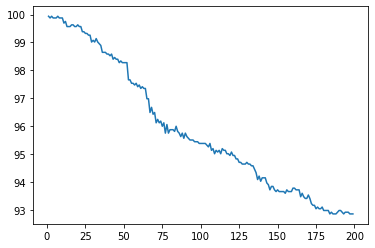

In [131]:
plt.plot(k_values,acc)

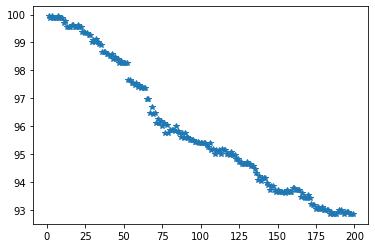

In [132]:
plt.plot(k_values,acc,"*")

# Observation :-
Accuracy for the Knn model is 0.95 means around 95% 

# Lets build a model based on SVM

In [88]:
from sklearn.svm import SVC

In [89]:
svc_ms= SVC()

In [90]:
svc_ms.fit(ms_train_x, ms_train_y)

SVC()

In [91]:
pred_ms=svc_ms.predict(ms_test_x)

In [92]:
pred_ms

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [93]:
from sklearn.metrics import confusion_matrix


In [94]:
tab1= confusion_matrix(ms_test_y,pred_ms)

In [95]:
tab1

array([[727,  15],
       [  1, 882]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


In [185]:
acc = accuracy_score(ms_test_y,pred_ms)
accuracies['SVM'] = acc
acc

0.9507692307692308

In [98]:
recall_score(ms_test_y,pred_ms)

0.9988674971687429

In [99]:
precision_score(ms_test_y,pred_ms)

0.9832775919732442

In [145]:
svc_ms= SVC(kernel='linear')

In [146]:
svc_ms.fit(ms_train_x, ms_train_y)

SVC(kernel='linear')

In [147]:
pred_ms=svc_ms.predict(ms_test_x)

In [148]:
tab1= confusion_matrix(ms_test_y,pred_ms)

In [149]:
tab1

array([[740,  26],
       [ 14, 845]], dtype=int64)

# Observation :-
 Accuracy of a SVM model is 99% 

# Comparing Model

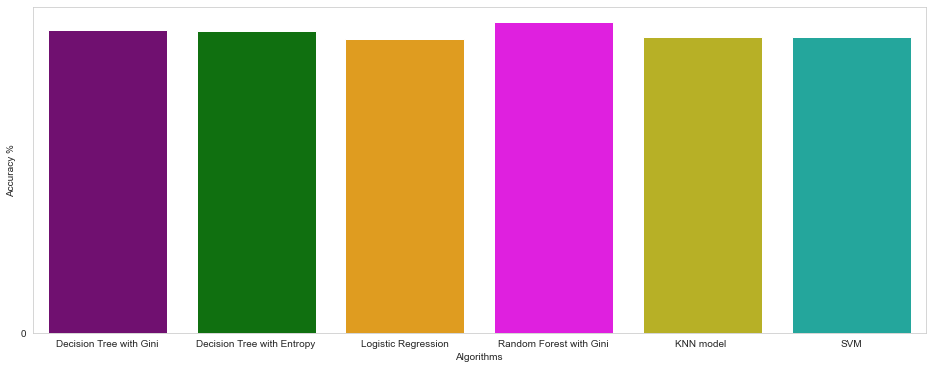

In [201]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.yticks(np.arange(0,100,12))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Observation 
From the above graph we say that our models work fine but best of them 
are Random Forest with Gini , accuracy is arround 99% . 